# Airbnb analysis: NYC 
### Ayesha Siddiqua - CalTech Data Analytics certificate program

### Objective: To understand and analyze the data in order to provide insightful information.

### EDA using python:

In [1]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
data = pd.read_csv("Airbnb.csv")

In [3]:
data.head()

,Unnamed: 0,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,10/19/18,0.21,6.0,365.0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,NaN,5/21/19,0.38,2.0,NaN
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,NaN,harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,07-05-2019,4.64,1.0,194.0
4,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,murray hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,6/22/19,0.59,1.0,129.0


In [4]:
#Size of data
data.shape

(42638, 17)

No. of rows: 42638


No. of Columns: 17

In [5]:
#Descriptive statistics for numerical data
data.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,42638.000000,4.263800e+04,4.263800e+04,42607.000000,42609.000000,42602.000000,42604.000000,42613.000000,33902.000000,42622.000000,42596.000000
mean,24323.437544,1.892386e+07,6.633856e+07,40.725488,-73.949830,148.516173,6.974298,23.045080,1.346574,6.840036,111.562447
std,14062.225405,1.094655e+07,7.755554e+07,0.054140,0.046089,235.828980,20.295628,44.411525,1.636901,32.246048,131.392817
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,12117.250000,9.410163e+06,7.650650e+06,40.688225,-73.979220,65.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,24300.500000,1.956904e+07,3.028359e+07,40.718130,-73.954370,100.000000,3.000000,5.000000,0.690000,1.000000,42.000000
75%,36444.500000,2.897789e+07,1.056342e+08,40.756690,-73.933800,174.000000,5.000000,23.000000,2.000000,2.000000,224.000000
max,48892.000000,3.648543e+07,2.743115e+08,40.904840,-73.712990,10000.000000,1250.000000,629.000000,20.940000,327.000000,365.000000


In [6]:
#Dropping unnecessary columns
data.drop("Unnamed: 0", axis=1, inplace=True)
data.drop("last_review", axis=1, inplace=True)

In [7]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'borough', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [8]:
#Checking if there are any duplicated values
np.sum(data.duplicated())

0

## Handling missing values

In [9]:
#Count of null values in data
missing_values_count = np.sum(data.isnull())
missing_values_count

id                                   0
name                                14
host_id                              0
host_name                           56
borough                             67
neighbourhood                        0
latitude                            31
longitude                           29
room_type                           86
price                               36
minimum_nights                      34
number_of_reviews                   25
reviews_per_month                 8736
calculated_host_listings_count      16
availability_365                    42
dtype: int64

In [10]:
#Calculating the pecentage of null values in the datset

If the data has more than 20% missing values, we can drop such columns

In [11]:
total_cells = np.product(data.shape)
total_missing_cells =  missing_values_count.sum()

#calculating the percentage of missing values
percentage_missing = np.round((total_missing_cells / total_cells) * 100, 2)
print("The Percentage of missing values in the dataset is:", percentage_missing) 

The Percentage of missing values in the dataset is: 1.43


We can drop the rows that have null values and since reviews_per_month has a large number of null values (8736), we can replace the null values with the median value of the column

In [12]:
#Replacing the null values with the median for reviews_per_month column
data["reviews_per_month"] = data.reviews_per_month.fillna(data.reviews_per_month.median())

In [13]:
#Dropping the rows that have even 1 null value for any column
cleaned_data = data.dropna(axis=0, how="any")

In [14]:
#Calculating percentage of rows that were dropped to validate that it will not affect the data analysis
no_droped_rows = len(data)-len(cleaned_data)
percentage_dropped_rows = round((no_droped_rows/42638)*100,2)
percentage_dropped_rows

0.78

In [15]:
#Verifying the cleaned data has no missing values
np.sum(cleaned_data.isnull()) 

id                                0
name                              0
host_id                           0
host_name                         0
borough                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
#Since Price column is one of the key columns in making business insights, let us have a look at it
cleaned_data.price.describe()

count    42305.000000
mean       148.625316
std        236.469264
min          0.000000
25%         65.000000
50%        100.000000
75%        174.000000
max      10000.000000
Name: price, dtype: float64

**Note:** We can observe that the minimum price is 0 which is cannot be true in real time. This value can affect the analysis and calculations performed on this column. Hence, we need to remove / exclude the rows that have price has 0

In [17]:
#Excluding prices in data that are equal to 0
df = cleaned_data[cleaned_data["price"] != 0]

In [18]:
df.head()

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,murray hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,0.59,1.0,129.0
7,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,upper west side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,0.43,1.0,6.0
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,south slope,40.66829,-73.98779,Private room,89.0,4.0,167.0,1.34,3.0,314.0


In [19]:
#Verifying that 0 is no more the minimum price of any AirBnb
df.price.describe()

count    42295.000000
mean       148.660456
std        236.486173
min         10.000000
25%         65.000000
50%        100.000000
75%        174.500000
max      10000.000000
Name: price, dtype: float64

In [20]:
df.borough.value_counts()

Brooklyn         19179
Manhattan        16858
Queens            5150
Bronx              686
Staten Island      339
Queen               63
Brookly              9
Manhatteen           5
Manhattn             4
Mahattan             2
Name: borough, dtype: int64

We can observe that Manhattan, Brooklyn AND Queens are mis-spelled and the values need to be corrected and combined

In [21]:
df = df.replace(to_replace={"borough" : {"Manhatteen" : "Manhattan","Manhattn": "Manhattan" , "Mahattan": "Manhattan" , "Queen" : "Queens" , "Brookly" : "Brooklyn" }})

In [22]:
df.borough.value_counts()

Brooklyn         19188
Manhattan        16869
Queens            5213
Bronx              686
Staten Island      339
Name: borough, dtype: int64

***Checkpoint:*** We have obtained a list of only 5 boroughs in NYC and the rows have been combined to the correct spelling value. 

In [23]:
df.neighbourhood.value_counts()

williamsburg          3878
bedford-stuyvesant    3668
harlem                2639
bushwick              2440
upper west side       1954
east village          1840
upper east side       1784
crown heights         1551
midtown               1534
chelsea               1103
greenpoint            1099
lower east side        904
astoria                896
washington heights     895
financial district     741
flatbush               615
clinton hill           566
long island city       534
park slope             499
east flatbush          494
fort greene            483
murray hill            478
kips bay               469
ridgewood              423
flushing               420
greenwich village      389
sunset park            382
chinatown              362
sunnyside              362
soho                   357
                      ... 
douglaston               7
baychester               7
shore acres              7
tottenville              7
mount eden               6
bay terrace              6
m

No need of any correction in the neighbourhood column

## Handling Outliers in data

#### Since our end goal is to analyze the real estate in NYC and to understand how expensive NYC can be, "Price" Column is going to be very important for our analysis

Price is a key column in making any statistical based decision, let us analyze and observe the outliers. 

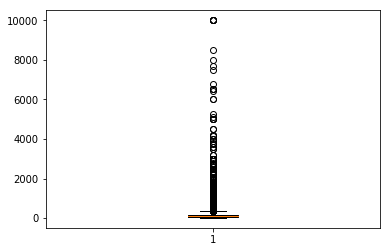

In [24]:
plt.boxplot(df.price)
plt.show()

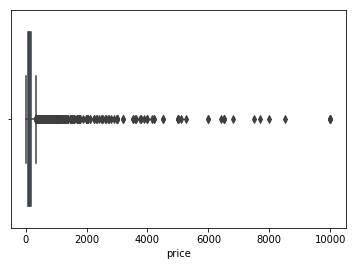

In [25]:
sns.boxplot(df['price'])

At a glance, there are many outliers and the boxplot is not clear. Let us calculate the outliers to understand better

Finding the Inter quartile range - IQR

In [26]:
percentile25 = df['price'].quantile(0.25)
percentile75 = df['price'].quantile(0.75)
iqr = percentile75-percentile25
print("Q3 is %0.2f, Q1 is %0.2f and IQR is %0.2f" %(percentile75, percentile25, iqr))

Q3 is 174.50, Q1 is 65.00 and IQR is 109.50


Calculating the upper and lower limits

In [27]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit for cutoff is %0.3f and the lower limit for cutoff is %0.3f" %(upper_limit, lower_limit))

Upper limit for cutoff is 338.750 and the lower limit for cutoff is -99.250


### Finding the outliers

In [28]:
df[df['price'] > upper_limit]
df[df['price'] < lower_limit]

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


#### We will be using 2 methods to remove outliers. 
1. Trimming

2. Capping

### Trimming:  It excludes the outlier values from our analysis.The data becomes thin when there are more outliers present in the dataset.

In [29]:
new_df = df[df['price'] < upper_limit]
new_df.shape

(39879, 15)

#### Comparing the plots after trimming

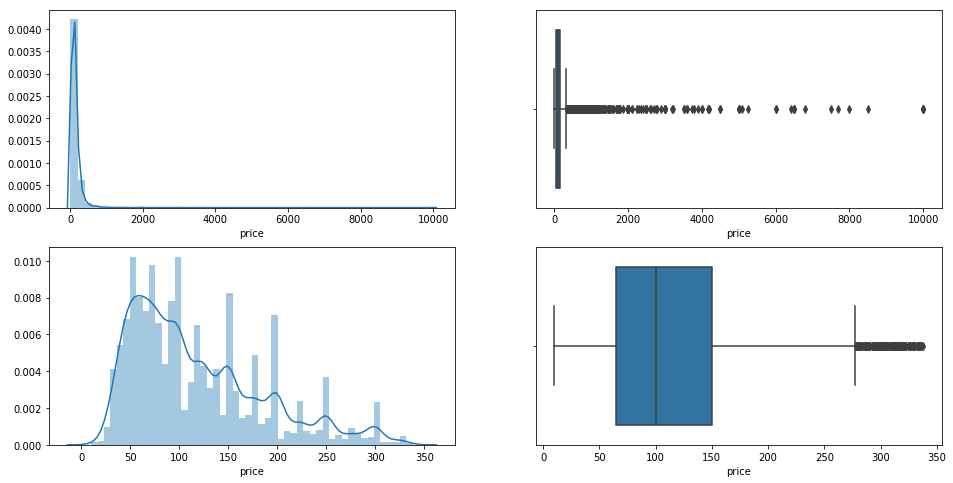

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price'])
plt.subplot(2,2,2)
sns.boxplot(df['price'])
plt.subplot(2,2,3)
sns.distplot(new_df['price'])
plt.subplot(2,2,4)
sns.boxplot(new_df['price'])
plt.show()

We can observe the drastic trimming of outliers from our data range.

### Capping: we cap our outliers data and make the limit, above a particular value or less than that value, all the values will be considered as outliers, and the number of outliers in the dataset gives that capping number.

In [31]:
new_df_cap = df.copy()
new_df_cap['price'] = np.where(
    new_df_cap['price'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['price'] < lower_limit,
        lower_limit,
        new_df_cap['price']
    )
)

#### Comparing the plots after capping

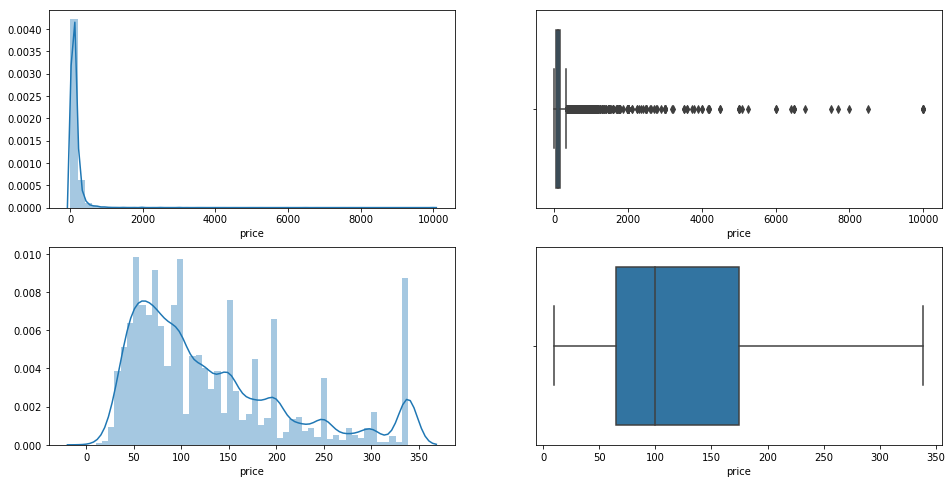

In [32]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['price'])
plt.subplot(2,2,2)
sns.boxplot(df['price'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['price'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['price'])
plt.show()

The plot above indicates that all outliers have been removed from our price data and the new data obtained now is more useful to analyse pricing in NYC on an average.

## Data Visualization

***Q1. Which boroughs and neighbourhoods have the greatest residential housing stock?***


Housing stock :  the total number of houses and apartments in an area.


In [33]:
listings_boroughs = new_df.groupby('borough')['name'].count().sort_values(ascending = False)
listings_boroughs

borough
Brooklyn         18534
Manhattan        15218
Queens            5121
Bronx              672
Staten Island      334
Name: name, dtype: int64

Text(0, 0.5, 'Count / Housing stock')

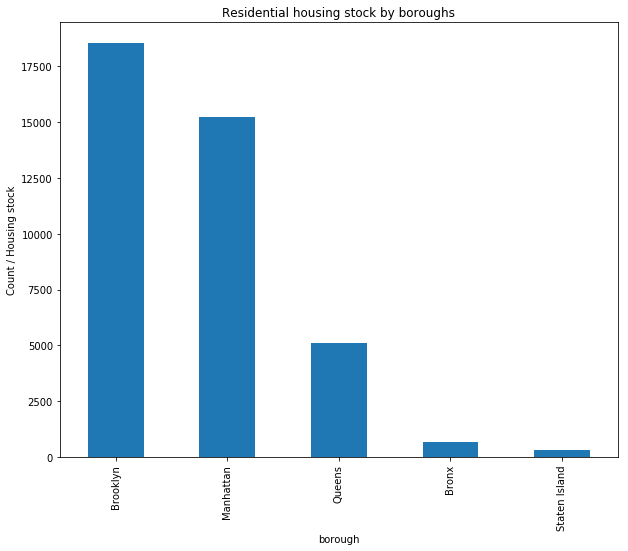

In [34]:
#plotting
listings_boroughs.plot(kind = 'bar', title = 'Residential housing stock by boroughs',  figsize=(10,8))
plt.ylabel('Count / Housing stock')

***Inference:*** : Brooklyn and Manhattan have the greatest residential stock in NYC

In [35]:
listings_neighbourhood = new_df.groupby('neighbourhood')['name'].count().nlargest(n=10).sort_values(ascending = False)
listings_neighbourhood

neighbourhood
williamsburg          3691
bedford-stuyvesant    3594
harlem                2566
bushwick              2413
upper west side       1775
east village          1702
upper east side       1657
crown heights         1508
midtown               1138
greenpoint            1054
Name: name, dtype: int64

Text(0, 0.5, 'Count / Housing stock')

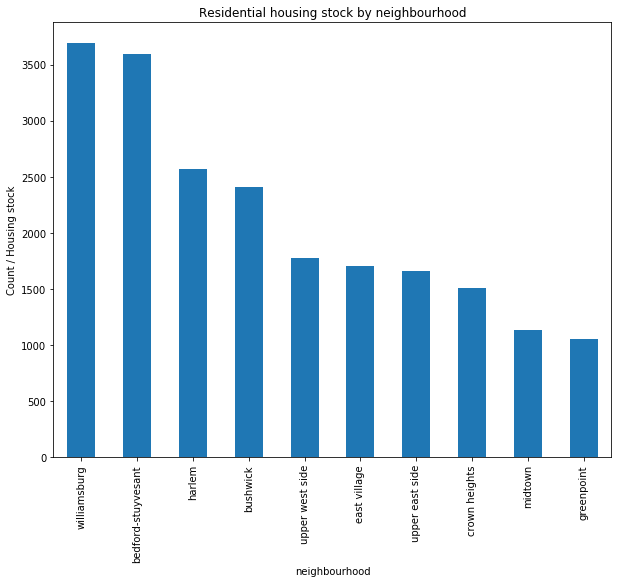

In [36]:
#plotting
listings_neighbourhood.plot(kind = 'bar', title = 'Residential housing stock by neighbourhood',  figsize=(10,8))
plt.ylabel('Count / Housing stock')

***Inference***: Williamsburg and Vedford-Stuy have the greatest hosuing stock across all neighborhoods in NYC. Both are located in Brooklyn.

***Q2. How do prices vary among the boroughs? Which borough is the most expensive?***

In [37]:
#Median Listing Price by borough
median_listing_price = new_df.groupby('borough')['price'].agg('median').sort_values(ascending = False)
np.round(median_listing_price, 2)

borough
Manhattan        130.0
Brooklyn          90.0
Staten Island     75.0
Queens            70.0
Bronx             65.0
Name: price, dtype: float64

Text(0, 0.5, 'Lisitng Price (USD)')

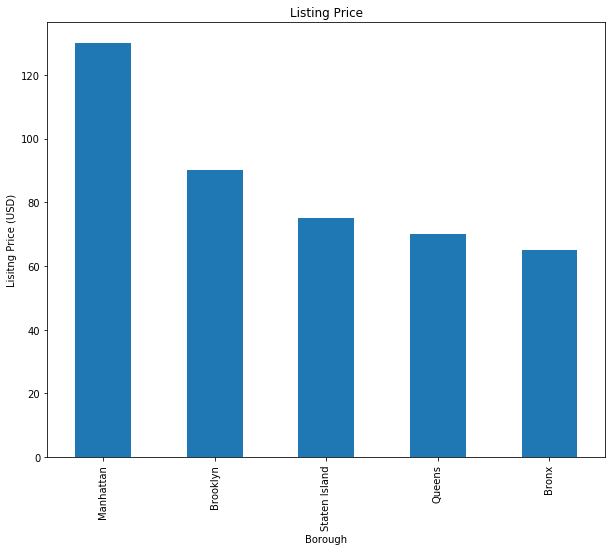

In [38]:
#Plotting median listing price
median_listing_price.plot(kind='bar', title = "Listing Price", figsize=(10,8))
plt.xlabel('Borough')
plt.ylabel('Lisitng Price (USD)')

In [39]:
#Sum Listing Price by borough
sum_listing_price = new_df.groupby('borough')['price'].agg('sum').sort_values(ascending = False)
np.round(sum_listing_price, 2)

borough
Manhattan        2188843.0
Brooklyn         1962475.0
Queens            451941.0
Bronx              50222.0
Staten Island      30061.0
Name: price, dtype: float64

***Inference***: Manhattan is the most expensive borough in NYC. Followed by Brooklyn. Bronx is the cheapest Neighborhood in NYC. The hosuing stock and prices seem to be less in Bronx.

**As most of the tourist locations and prime business centers are in Manhttan and Brooklyn, the real estate is going to be high in both these neighborhood groups.**

***Q3.Which room type is the most common? Which room type will appeal to a traveler whose accommodation is paid for by their company?***

In [50]:
count_room_type = new_df.groupby('room_type')['room_type'].count().sort_values(ascending = False)
count_room_type

room_type
Entire home/apt    19534
Private room       19412
Shared room          933
Name: room_type, dtype: int64

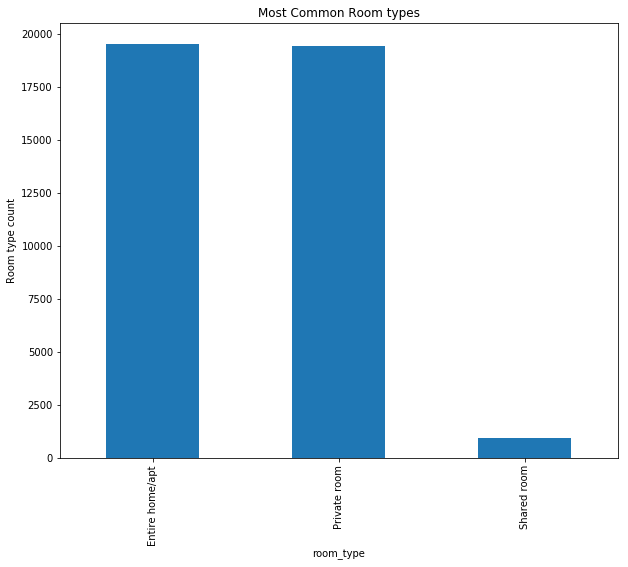

In [52]:
#plotting
count_room_type.plot(kind = 'bar', title = 'Most Common Room types',  figsize=(10,8))
plt.ylabel('Room type count')
plt.show()

***Inference***: Entire home/apt. are the most common type of accomodation in NYC followed by Private rooms. Guests prefer privacy and comfort during traveling resulting in shared rooms to be the least preferred type of rooms.

In [63]:
#Pricing acroos diff. types of accomodation
avg_price_room_type = new_df.groupby(['room_type','borough'])['price'].agg('mean').sort_values(ascending = False)
np.round(avg_price_room_type, 2)

room_type        borough      
Entire home/apt  Manhattan        179.25
                 Brooklyn         149.05
                 Queens           131.59
                 Staten Island    123.01
                 Bronx            110.86
Private room     Manhattan         95.47
Shared room      Manhattan         77.25
Private room     Brooklyn          70.31
                 Queens            65.36
                 Staten Island     63.10
Shared room      Staten Island     63.00
Private room     Bronx             57.62
Shared room      Brooklyn          47.76
                 Queens            46.96
                 Bronx             46.18
Name: price, dtype: float64

In [60]:
#availability acroos diff. types of accomodation
best_room_type_location = new_df.groupby(['room_type','borough'])['reviews_per_month'].agg('count').sort_values(ascending = False)
np.round(best_room_type_location, 2)

room_type        borough      
Private room     Brooklyn         9656
Entire home/apt  Manhattan        8853
                 Brooklyn         8486
Private room     Manhattan        6050
                 Queens           3108
Entire home/apt  Queens           1823
Private room     Bronx             422
Shared room      Brooklyn          392
                 Manhattan         315
Entire home/apt  Bronx             222
Shared room      Queens            190
Private room     Staten Island     176
Entire home/apt  Staten Island     150
Shared room      Bronx              28
                 Staten Island       8
Name: reviews_per_month, dtype: int64

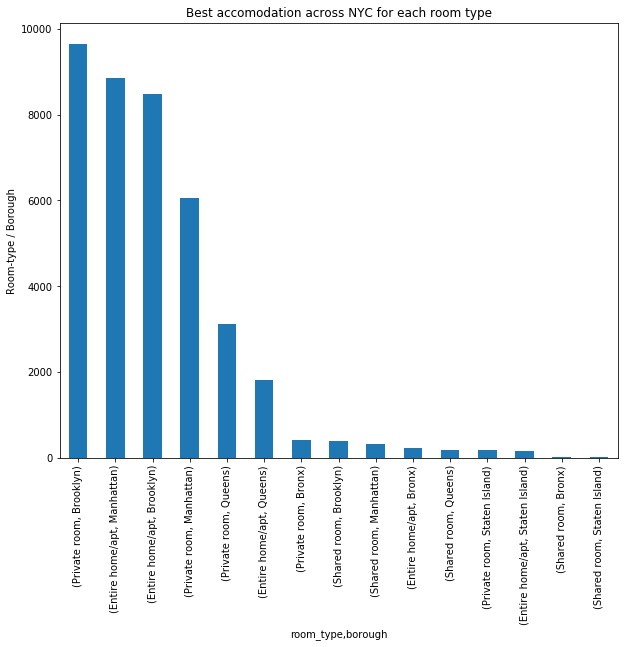

In [62]:
#plotting
best_room_type_location.plot(kind = 'bar', title = 'Best accomodation across NYC for each room type',  figsize=(10,8))
plt.ylabel('Room-type / Borough')
plt.show()

To decide best suited accomodation for a traveler whose acc. is paid by the company, following factors are considered: 

    1. Price
    
    2. Location
    
    3. Reviews
    
From the above 2 calculations, we can infer that -

* private rooms in Brooklyn, private rooms and entire houses in Brooklyn and Manhattan have the maximum number of positive reviews. 

* Avg. cost of an entire house in Manhattan is ~180 dollars and in Brooklyn is 150.

Both these neighborhood groups are close by to all business centers in NYC. 

**An entire house in Brooklyn is best for a working traveler as the location is good, and the price is not very expensive, most importanty as amazing reviews!!** 

**The traveler can cook his own food and can save money spent on travelling and food outside!!**

Note: Since in the data it is not mentioned exclusively if the reviews are bad or good, we are going to assume these are the positive reviews for our analysis.
    

***Q4.Which borough/neighborhood generates the highest revenue as well as the highest revenue per unit (one unit is one listing)?***

In [68]:
revenue_borough = new_df.groupby('borough')['price'].agg('sum').sort_values(ascending = False)
np.round(revenue_borough, 2)

borough
Manhattan        2188843.0
Brooklyn         1962475.0
Queens            451941.0
Bronx              50222.0
Staten Island      30061.0
Name: price, dtype: float64

In [74]:
revenue_borough_listings = new_df.groupby(['borough','name'])['price'].agg('sum').nlargest(n=10).sort_values(ascending = False)
np.round(revenue_borough_listings, 2)

borough    name                                              
Queens     Hillside Hotel                                        2538.0
Brooklyn   Loft Suite @ The Box House Hotel                      2189.0
           Brooklyn Apartment                                    1140.0
Manhattan  A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE       1095.0
           IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS    1051.0
Queens     Home away from home                                    909.0
Brooklyn   Beautiful Brooklyn Brownstone                          835.0
Manhattan  Sixth Ave Chelsea, 1bd Serviced Apartment              829.0
Brooklyn   Loft Suite @ Box House Hotel                           796.0
           Bushwick Oasis                                         754.0
Name: price, dtype: float64

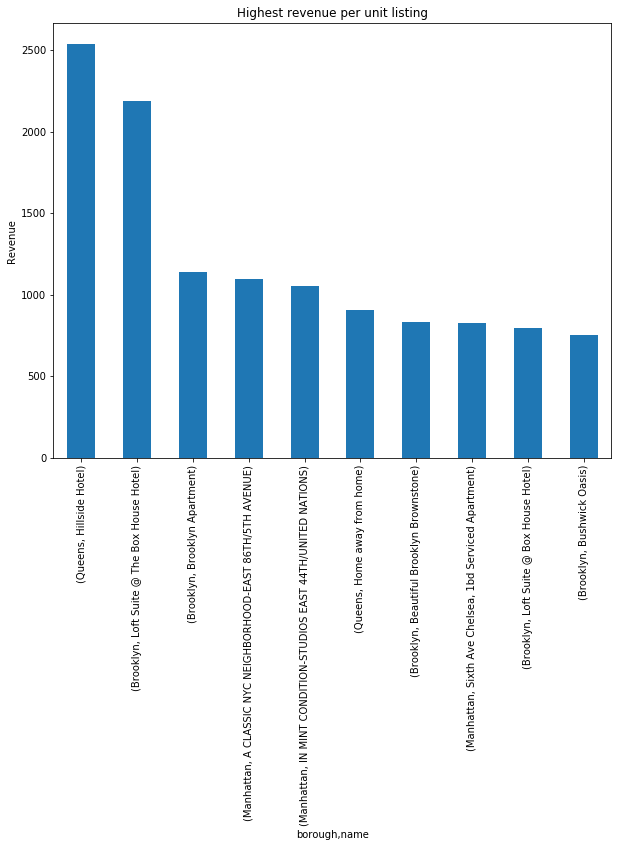

In [75]:
#plotting
revenue_borough_listings.plot(kind = 'bar', title = 'Highest revenue per unit listing',  figsize=(10,8))
plt.ylabel('Revenue')
plt.show()

***Hillside Hotel in Queens generates avg. revenue of 2538.0 dollars
Loft Suite @ The Box House Hotel (2189.0) and Brooklyn Apartment(1140.0) in Brooklyn and
A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE(1095.0), IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS(1051.0) in Manhattan Genrate the maximum avg. revenue in NYC***

***Q5. How does availability differ among the boroughs?***

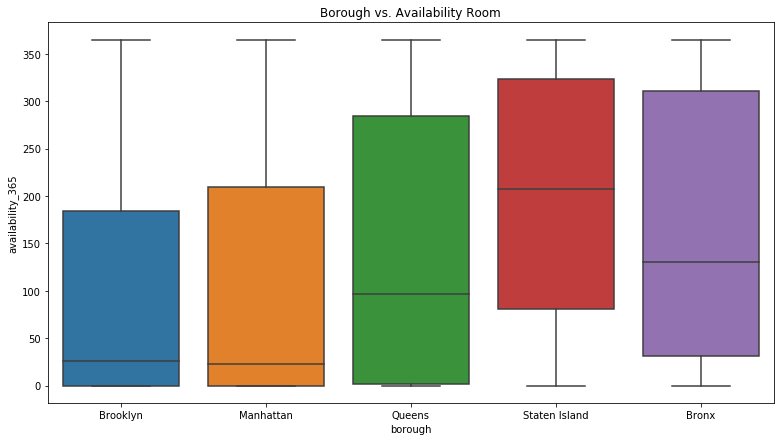

In [76]:
plt.figure(figsize=(13,7))
plt.title("Borough vs. Availability Room")
sns.boxplot(data=new_df, x='borough',y='availability_365')
plt.show()

***Bronx and Staten Island are the least preferred regions in NYC but are the most available neighborhoods.
Further analysis can be done to identify the cause for this.
The conditions for the properties can be improved and be made more profitable***


***Since the demand for tourist locations like Manhattan and Brooklyn are more, availability is less as compared to Bronx and Staten Island***

***Q6.Which boroughs should the company explore for expansion into the residential accommodation market in New York City? Why?***

Factors the company should consider while expanding their business in NYC:

1. Average cost the guest is willing to spend


2. Locations to consider that are alreasy are guest's favourite


3. Locations that have less positive reviews and can be improved.


4. Reviews of the previous guests


Inference: 
1. Manhattan and Brooklyn are the most expensive neighborhood groups in NYC. 


2. Guests mostly prefer entire rooms to themselves and hence the company should look into such properties.


3. Since availabilty is more in Bronx and staten Island, these properties can be improved in order to increase revenue from them


4. Brooklyn and Queens is more affordable and have good reviews. Therefore, for a traveler on a budget, properties in Brooklyn and Queens would be better and can be marketed accordingly. 

***Q7. Which hosts have more than one property up for rent? What is the maximum number of properties owned by one host?***

In [78]:
host_value_counts_greater_than_1 = np.sum(new_df.host_id.value_counts() > 1)
host_value_counts_greater_than_1

4261

4261 hosts have properties more than 1 in NYC

In [79]:
count_host_property = new_df.groupby('host_name')['name'].count().nlargest(n=10).sort_values(ascending = False)
count_host_property

host_name
Michael         337
David           311
Sonder (NYC)    233
Alex            215
John            205
Sarah           204
Daniel          195
Maria           168
Jessica         163
Anna            156
Name: name, dtype: int64

Text(0, 0.5, 'Number of properties')

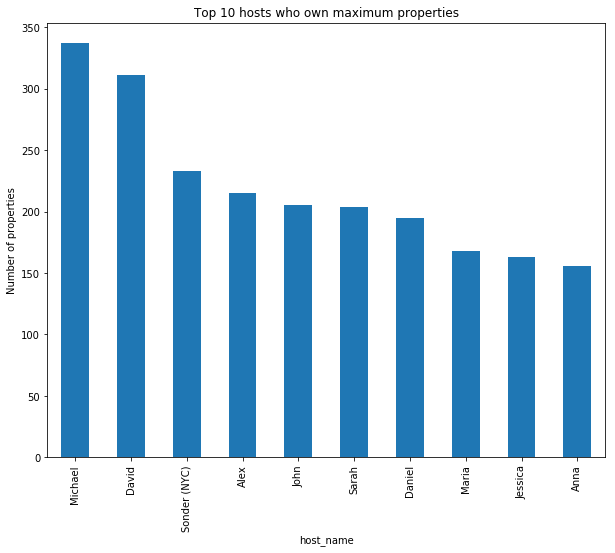

In [80]:
count_host_property.plot(kind = 'bar', title = 'Top 10 hosts who own maximum properties',  figsize=(10,8))
plt.ylabel('Number of properties')

Micheal has the maximum number of listings in NYC

***Q8.How expensive is real estate in NYC? How does the price of a residential unit vary by neighbourhood?***

***NYC is the 6th most expensive city in the World!!!*** 

* Living in NYC is expensive, as it is known for its tourism, universities and businesses. A lot of revenue is generated from Manhattan and Brooklyn. An avg. of 1962,475 dollars is generated from these 2 locations alone!



* There is a gradual price drop from Brooklyn to Queens, Staten Island and Bronx. Bronx is the cheapest neighborhood to stay in.



* Queens is a much more affordable option!

* On an avg. it would cost around 80-120 dollars for a guest to stay in a private room/entire house/apt. in mid range location.


* The costliest accommodations can go above 300 dollars as well!!! 


* Let us see how prices vary in these listings.

***How do prices vary across neighborhoods***

In [82]:
top_ten_neighborhoods = new_df.groupby('neighbourhood')['price'].agg('median').nlargest(n=10).sort_values(ascending = True)
top_ten_neighborhoods

neighbourhood
mill basin            167.5
chelsea               175.0
greenwich village     175.0
midtown               175.0
murray hill           175.0
financial district    189.0
flatiron district     190.0
tribeca               227.0
neponsit              237.0
willowbrook           249.0
Name: price, dtype: float64

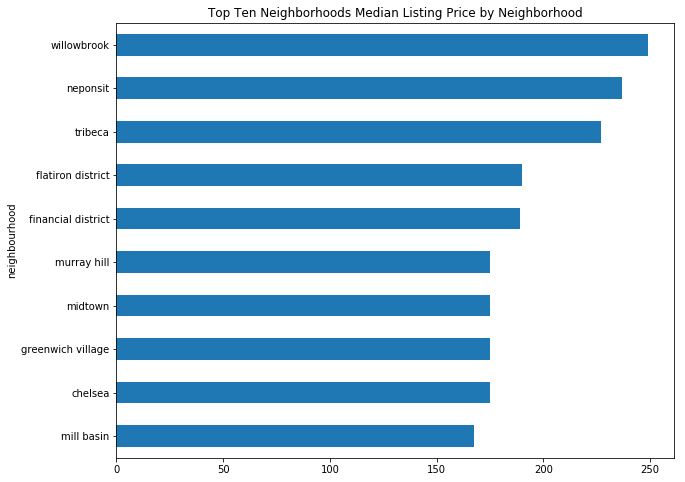

In [83]:
top_ten_neighborhoods.plot(kind = 'barh', title = 'Top Ten Neighborhoods Median Listing Price by Neighborhood', figsize=(10,8))


In [86]:
bottom_ten_neighborhoods = new_df.groupby(['neighbourhood','borough'])['price'].agg('median').nsmallest(n=10).sort_values(ascending = False)
bottom_ten_neighborhoods

neighbourhood   borough      
whitestone      Queens           47.0
mount eden      Bronx            45.5
bull's head     Staten Island    45.0
van nest        Bronx            42.5
tremont         Bronx            41.0
new dorp beach  Staten Island    40.0
hunts point     Bronx            40.0
corona          Queens           40.0
castle hill     Bronx            39.0
concord         Staten Island    34.5
Name: price, dtype: float64

**The cheapest a guest can stay for is 34 dollars!!**

In [90]:
#Most expensive listings in NYC
most_expensive_listings = new_df.groupby(['borough','name'])['price'].agg('mean').nlargest(n=10).sort_values(ascending = True)
most_expensive_listings

borough    name                                                                    
Brooklyn   J&D Vacation Home                                                           335.0
           Spacious + beautiful Garden apt in brick townhouse                          335.0
           When modern renovation meets prewar details                                 335.0
Manhattan  2 Bedroom in Upper West right next to Central Park                          335.0
           Fabulous 2Bedroom/1.5Baths Duplex near Broadway                             335.0
           Manhattan New York                                                          335.0
           NYC High End 2BR Midtown West Apt                                           335.0
Brooklyn   ★1800ft²/195m²★3-Levels★Deck★Walk Score 96★Office★                          336.0
Manhattan  perfect apartment in New york with 3 bedrooms                               337.0
           Premium Chelsea 1BR w/ Gym, W/D, Doorman, Sundeck, Cinema, by Bluegr

As expected, costliest listings are in Manhattan and Brooklyn.

## Exporting data to work on Tableau

In [48]:
#new_df.to_csv("C:/Users/Dell/Documents/CalTech/NYCAirBnb/Cleaned_AirBnb_Data.csv")

## Conclusion:

1. EDA was done using Python. Null values and missing values were replaced using median (for reviews).
2. Price column had a lot of outliers which were removed using trimming and capping.
3. The data was analysed and visualized to provide insights
4. Tableau was used for data visualization
5. Microsft PPT was used to present the above inferences to make meaningful decisions. 

# * Tableau Links: Dashboard is divided into 2 for more visibility.

https://public.tableau.com/app/profile/ayesha.siddiqua2513/viz/PricingandRevenuegeneratedacrossneighborhoodsinNYC/PricingandRevenue


https://public.tableau.com/app/profile/ayesha.siddiqua2513/viz/HousingstockandavailabilityandtypeofaccommodationsinNYC/Housingstocktypeandavailability



### Note: presentation has been added to the folder separately.

### ---------------------------------------------------------- End-------------------------------------------------------------------- ###